# Introduction
Consider the Taylor series about a point $a$ and the $\sin$ function.

$f(x) = \sin(x)$.

$f(a) = \sum_{i=1}^{\infty} \frac{f^{(i)}(a)}{i!} (x-a)^i$

For the $\sin$ function, the taylor series looks like this:

$\sin(x) = \sum_{i=0}^{\infty} \frac{x^{2i+1}}{(2i+1)!}(-1)^{i}$

Unfortunately, our finite precision machines can evaluate neither the exact $\sin(x)$ function nor the infinite Taylor Series, so we must content ourselves with truncating the Taylor Series after a finite number of terms and accept a level of error. 

$\sin(x) \approx \sum_{i=0}^{n} \frac{x^{2i+1}}{(2i+1)!}(-1)^{i}$


## Part 1 - Model Error

### Part 1.1

Implement a function $sin\_taylor(x, n)$ which approximates $sin(x)$ using a Taylor Series truncated after n terms. Compare the accuracy of this function to the inbuilt $sin(x)$ function for different numbers of terms in the series. 


Using plots and a description, explain your results. 

--------------
I put the code for every question first and the explanations below the graphs.

In [25]:
#importing everything needed for the assesment
import numpy as np
from matplotlib import pyplot as plt
from math import sin, factorial, cos, pi, log10, floor, asin

def sin_taylor(x,n):
    taylor_sum = 0

    for i in range(n):
        taylor_sum += (x**(2*i + 1)/factorial(2*i +1))*((-1)**i)

    return taylor_sum

Text(0.5, 1.0, 'Relative error over number of terms at x=1')

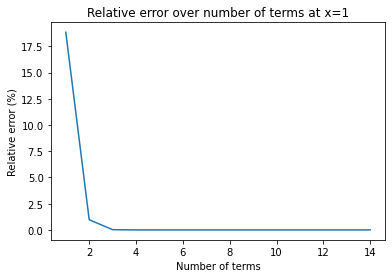

In [26]:
term_range = range(1,15)

y = [abs(sin_taylor(1, i) - sin(1))/sin(1)*100 for i in term_range]
x = [i for i in term_range]

plt.plot(x,y)
plt.xlabel("Number of terms")
plt.ylabel("Relative error (%)")
plt.title("Relative error over number of terms at x=1")

Firstly I plotted the Taylor series compared to the sin(x) function with a set value of x = 1 to see how it initially behaves. Just from this plot, we can already see that as we increase the values of n the relative error becomes smaller and almost constant. This is because when using smaller values of n (such as n = 1 and n = 2) we are simply approximating the sin(x) to a quadratic or linear function, this is because by omitting the larger n terms we are excluding how the function sin(x) oscillates (such as between 0 and 2pi) and this leads to a quite poor approximation of the function.

Text(0.5, 1.0, 'Relative error over number of terms with x changing')

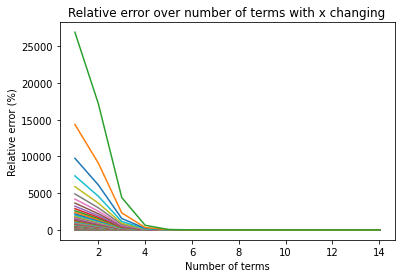

In [27]:
term_range = range(1,15)
def graph(x_value):
    y = [abs(sin_taylor(x_value, i) - sin(x_value))/sin(x_value)*100 for i in term_range]
    x = [i for i in term_range]
    plt.plot(x,y)
# x_term_range = np.arange(0.0)
# for i in np.arange(0,0.01, 0.001):
#     x_term_range = np.concatenate((x_term_range, np.arange((2*i-1)*pi-0.01, 2*i*pi)))

step = 0.01
for i in np.arange(0 + step,pi - step, step):
    graph(i)
plt.xlabel("Number of terms")
plt.ylabel("Relative error (%)")
plt.title("Relative error over number of terms with x changing")


Furthermore we look at how this approximation behaves with different values of x. This frist graph looks at the how the apporximation acts when the graph sin(x) is positive. In this case we see that the approxiation is quite poor with higher values of x (in this case the first green line seen being x = 3.14 and the values of x going down with the other lines). This is due to a similar reason than our previous explenation. With smaller values of x, sin(x) hasn't had the chance to oscillate as much and therefore the approximation with smaller values of n will be more accurate as it will resemble more a quadratic or linear function at those small values of x. However as the values of x increase the number of oscillations that sin(x) does becomes more and more relevants, but with low values of n it will keep ignoring those oscillations and approximate the fucntion closer to a linear or quadratic fucntion as previously stated.

Text(0.5, 1.0, 'Relative error over number of terms with x changing')

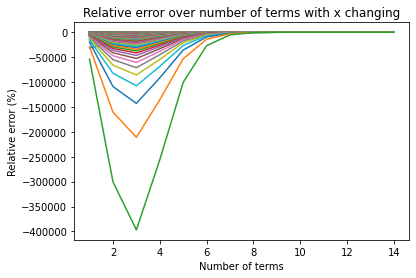

In [28]:
term_range = range(1,15)
def graph(x_value):
    y = [abs(sin_taylor(x_value, i) - sin(x_value))/sin(x_value)*100 for i in term_range]
    x = [i for i in term_range]
    plt.plot(x,y)
# x_term_range = np.arange(0.0)
# for i in np.arange(0,0.01, 0.001):
#     x_term_range = np.concatenate((x_term_range, np.arange((2*i-1)*pi-0.01, 2*i*pi)))
step = 0.01
for i in np.arange(pi + step, 2 * pi - step, step):
    graph(i)
plt.xlabel("Number of terms")
plt.ylabel("Relative error (%)")
plt.title("Relative error over number of terms with x changing")


In this case we are looking at when sin(x) is negative and using those x values. The reason as to why the graphs looks from n = 3 onwards is the same as stated before. On the other hand for n = 1 to n = 3 the relative error starts low and increases as we are using x values from pi onwards, however when n = 1 the taylor function approximates more or less a linear function, which will be closer to what the sin(x) fucntion will look like at pi (still quite poor approximation though) and as n increases it is able to properly caputure the oscillations that occured between x = 0 and x = pi and so the relative error increases until it can properly capture this before going back down.

------------

## Part 1.2 

The small angle theorem states that for sufficiently small values of $x$

\begin{equation}
\sin(x) \approx x
\end{equation}

For example, $\sin(0.0001) \approx 0.00099999983...$

How small should $x$ be for this to hold, given a tolerance of a 0.01% relative error?

Using plots and a description, explain your results. 

$\sin(x) = \sum_{i=0}^{\infty} \frac{x^{2i+1}}{(2i+1)!}(-1)^{i}$

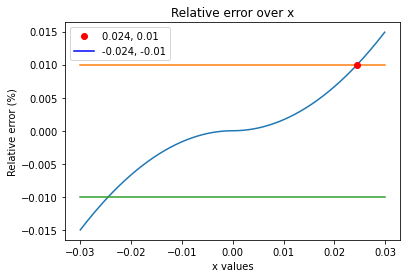

In [39]:
from shapely.geometry import LineString

x_values = np.arange(-0.03,0.03,0.0001)
y = [abs(i - sin(i))/sin(i)*100 for i in x_values]

plt.plot(x_values, y)
plt.xlabel("x values")
plt.ylabel("Relative error (%)")
plt.title("Relative error over x")
plt.plot(x_values, [0.01 for i in range(len(x_values))])
plt.plot(x_values, [-0.01 for i in range(len(x_values))])


graph = LineString(np.column_stack((x_values, y)))
line_1 = LineString(np.column_stack((x_values, [0.01 for i in range(len(x_values))])))
line_2 = LineString(np.column_stack((x_values, [-0.01 for i in range(len(x_values))])))
intersection_1 = graph.intersection(line_1)
intersection_2 = graph.intersection(line_2)

plt.plot(*intersection_1.xy, 'ro', label = f'{np.around(intersection_1.x,3)}, {intersection_1.y}')
plt.plot(*intersection_2.xy, color = 'blue', label = f'{np.around(intersection_2.x,3)}, {intersection_2.y}')
plt.legend()
plt.show()



This plot shows that for the small angle theorem, in order for the approximation to work x should be in between x = -0.024 and x = 0.024. We can also clearly see that in both sides the relative error gets larger as x increases this is because as the name describes the small angle theorem works best for smaller angles, so as x gets larger the angles get bigger and therefore the approximation gets less and less accurate.

More over the graph looks like that as sin is "symmetrical" in the way that the graph at x < 0 looks the same as x > 0 but inverted over teh x axys, therefore the relative error will also be mirrored over the x axis.

------------

## Part 1.3


Repeat Parts 1.1 and 1.2 using the $\cos$ function. 
Using plots and a description, explain your results.

Hint 1: you may need to derive the taylor series expansion for cos yourself. 

Hint 2: The small angle theorem for the $\cos$ function is $\cos(\theta) \approx 1 - \frac{\theta^2}{2} $ for small $\theta$

This is the taylor approximation of cos(x)

$$\cos(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!} x^{2n}$$



In [40]:
def cos_taylor(x,n):
    taylor_sum = 0

    for i in range(n):
        taylor_sum += x**(2*i)*(-1)**i/factorial(2*i)

    return taylor_sum

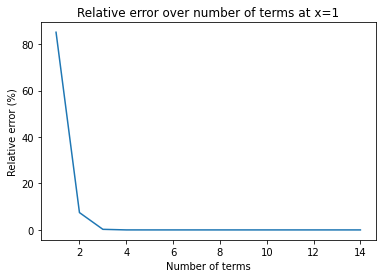

In [41]:
term_range = range(1,15)

y = [abs(cos_taylor(1, i) - cos(1))/cos(1)*100 for i in term_range]
x = [i for i in term_range]


plt.plot(x,y)
plt.xlabel("Number of terms")
plt.ylabel("Relative error (%)")
plt.title("Relative error over number of terms at x=1")
plt.show()




Pretty similar to the sin(x) function and its approximation, the larger the n values are the more accurate the approximation is. This is due to smaller n values (n = 1 and n = 2) ignoring how the cos(x) function oscillates but as they get bigger (generally n >= 3) the oscillation is taken into account by the taylor function by including more and more higher order terms. In this case, we are just looking at x = 1 as a base case.

Text(0.5, 1.0, 'Relative error over number of terms with x changing')

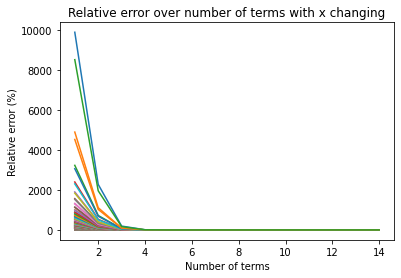

In [42]:
term_range = range(1,15)
def graph(x_value):
    y = [abs(cos_taylor(x_value, i) - cos(x_value))/cos(x_value)*100 for i in term_range]
    x = [i for i in term_range]
    plt.plot(x,y)

step = 0.01
for i in np.arange(-pi/2 + step, pi/2 - step, step):
    graph(i)
plt.xlabel("Number of terms")
plt.ylabel("Relative error (%)")
plt.title("Relative error over number of terms with x changing")


This graph (looking at when cos(x) is positive) and the one below (when cos(x) is negative) behave pretty much the same way that the sin(x) behaved previously. So larger x values are less accurate as the cos(x) would have oscillated in order to get there while in the taylor function by truncating to n = 1 or n = 2 it's not taking into account these oscillations and approximating the graph more to a quadratic or linear function than the original oscillating shape.

Text(0.5, 1.0, 'Relative error over number of terms with x changing')

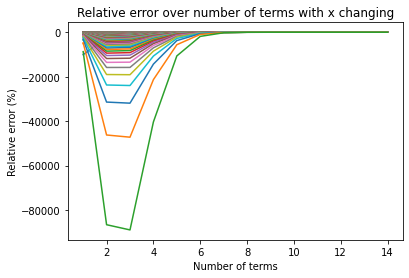

In [43]:
term_range = range(1,15)
def graph(x_value):
    y = [abs(cos_taylor(x_value, i) - cos(x_value))/cos(x_value)*100 for i in term_range]
    x = [i for i in term_range]
    plt.plot(x,y)

step = 0.01
for i in np.arange(pi/2 + step,3*pi/2 - step, step):
    graph(i)
plt.xlabel("Number of terms")
plt.ylabel("Relative error (%)")
plt.title("Relative error over number of terms with x changing")

The same reasoning comes when looking at when cos(x) is negative, but when n < 3 it is somewhat more accurate due to the first points where cos(x) < 0 being closer to a parabola or linear function, then this accuracy decreases as n gets larger due to the change in the curve of cos(x) before going back down again as n increases further now that it can take into account cos(x) oscillating more.

C:\Users\carmen\AppData\Local\Temp\ipykernel_34580\2309291108.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(*intersection_split[1].xy, 'ro', color = 'blue',label = f'{np.around(intersection_split[1].x,3)}, {intersection_split[1].y}')


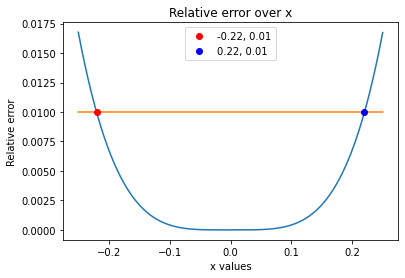

In [44]:
x_values = np.arange(-0.25,0.25,0.0001)
y = [abs((1 - i**2/2) - cos(i))/cos(i)*100 for i in x_values]

plt.plot(x_values, y)
plt.xlabel("x values")
plt.ylabel("Relative error")
plt.title("Relative error over x")
plt.plot(x_values, [0.01 for i in range(len(x_values))])



graph = LineString(np.column_stack((x_values, y)))
line_3 = LineString(np.column_stack((x_values, [0.01 for i in range(len(x_values))])))
intersection_cos = graph.intersection(line_3)
intersection_split = list(intersection_cos.geoms)

plt.plot(*intersection_split[0].xy, 'ro', label = f'{np.around(intersection_split[0].x,3)}, {intersection_split[0].y}')
plt.plot(*intersection_split[1].xy, 'ro', color = 'blue',label = f'{np.around(intersection_split[1].x,3)}, {intersection_split[1].y}')

plt.legend()

plt.show()

This plot shows that for the small angle theorem, in order for the approximation to be within the error threshold of 0.01% x should be in between x = -0.22 and x = 0.22. We can also clearly see that on both sides the relative error gets larger as x increases this is because (as stated previously) as the name describes the small angle theorem works best for smaller angles, so as x gets larger the angles get bigger and therefore the approximation gets less and less accurate.

Moreover, the graph looks like that as cos is symmetrical around the y axis therefore the relative error would also be symmetrical around the y-axis.

------------


# Part 2 - Data Error

Finite Precision strikes again! $\pi$ is a trancendental number, and cannot be fully stored in a finite precision machine. As a result, it is rounded after a finite number of decimal places. 

Explore how the accuracy of the function $f(x) = \sin(2\pi x)$ function is affected by rounding $\pi$ to various degrees of precision. Assume that your computer's inbuilt $\pi$ value is a sufficiently accuracte approximation to the true $\pi$.


Using plots and a description, explain your results. 

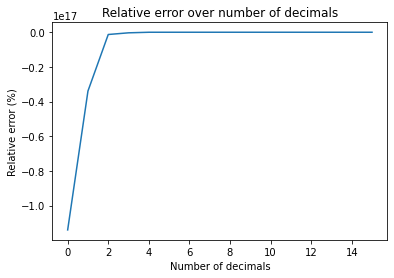

In [45]:
rounding_range = np.arange(0, 16)

pi_rounded = [np.around(pi, i) for i in rounding_range]
x = 1

y = [abs(sin(2*x*i) - sin(2*x*pi))/sin(2*x*pi)*100 for i in pi_rounded ]

plt.plot(rounding_range, y)
plt.xlabel("Number of decimals")
plt.ylabel("Relative error (%)")
plt.title("Relative error over number of decimals")
plt.show()

First I am only rounding pi up to 16 decimals as by default you only get 16 decimals with the default pi from my computer, because of this it's essentially useless to plot the rounding after 16 decimals. 

Now as we can see in the graph as we round the number to more decimals the relative error gets smaller. This is because, at any point with x = 1, 2*pi*x is going to equal 0, so as we round to less number (0 - 2) 2*pi*x will go negative and that's why the relative error is negative too. But as we round pi less 2*pi*x will get closer and closer to 0 until there's no difference.

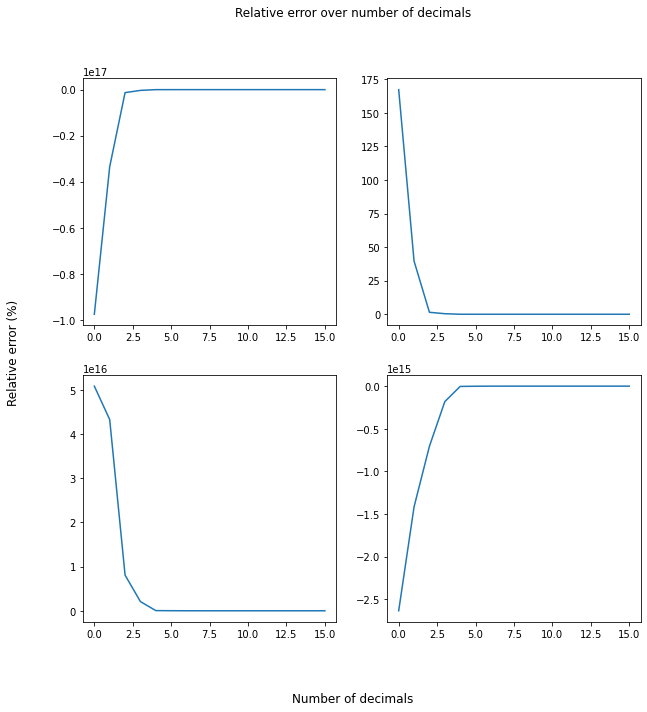

In [46]:
figure, axis = plt.subplots(2, 2)
figure.set_figheight(10)
figure.set_figwidth(10)

axis[0,0].plot(rounding_range,[abs(sin(2*-3.5*i) - sin(2*-3.5*pi))/sin(2*-3.5*pi)*100 for i in pi_rounded ])
axis[0,1].plot(rounding_range,[abs(sin(2*15.3*i) - sin(2*15.3*pi))/sin(2*15.3*pi)*100 for i in pi_rounded ])
axis[1,0].plot(rounding_range,[abs(sin(2*50*i) - sin(2*50*pi))/sin(2*50*pi)*100 for i in pi_rounded ])
axis[1,1].plot(rounding_range,[abs(sin(2*70*i) - sin(2*70*pi))/sin(2*70*pi)*100 for i in pi_rounded ])

figure.supxlabel("Number of decimals")
figure.supylabel("Relative error (%)")
figure.suptitle("Relative error over number of decimals")
plt.show()

This happens with pretty much every value of x (in this case showing x = -3.5, 15.3, 50, 70 going from left to right) where 2*pi*x (with pi rounded to n decimals) will get closer to the actual value as n increases and as n decreases will get further away and therefore increase the relative error. Although multiplying 2*pi by any x where x is an integer will result in sin(2*pi*x) approaching zero, so I also showed some floating point numbers in order to demonstrate that it still behaves pretty much the exact same.  

However as seen, not a lot of precision is needed in this case as we can see that even when pi is rounded to 4 decimals the relative error is pretty much zero, so the full 16 decimals aren't needed in this case.

-------

# Part 3 - Conditioning
We have now explored both model and data error sources. Let's explore things from another point of view. 

Relative Forward Error is defined as the relative difference between what an ideal model with ideal data would produce, and what our model and data produced;

$RFE(x) = |\frac{f(x) - \hat{f}(\hat{x})}{f(x)}|$

Relative Backward Error on the other hand desribes the change in input that would result in the observed output, given an ideal model:

$RBE = |\frac{x - \hat{x}}{x}|$

Now that the forward and backward error have been established, we can discuss the conditioning of a problem. 

The condition number of a model is defined as the ratio between the relative forward error and relative backward error. It describes how the function's output changes due to changes in input. 

$CN = \frac{RFE}{RBE}$

The Condition Number can also be approximated using the following formula;

$CN \approx |\frac{x*f'(x)}{f(x)}|$

A function is said to be well conditioned as long as its condition number is not much greater than 1. 



Evaluate the conditioning of the function $f(x) = \sin(2\pi x)$ function in two ways. Firstly, by calculating the relative forward and relative backward errors and computing their ratio. Seconly, by using the approximation formula. Explore different regions of the domain. 

Let us assume the following sources of error: 
* We approximate the $\sin$ function by truncating the taylor series after the first non-zero term. 
* x is rounded to 3 significant figures before it is put into f(x)

Hint: You may need to find the inverse of the model used in order to find $\hat{x}$

Using plots and a description, explain your results. 


$$ x^* = f^{-1}(\hat{f}( \hat{x})) $$

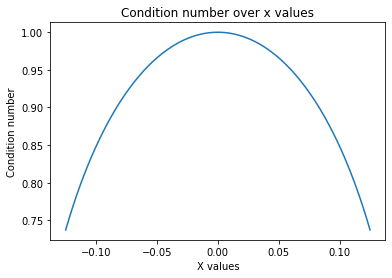

In [47]:
def f(x):
    return sin(2*pi*x)

def f_hat(x):
    return 2*pi*x

def round_sigfig(x):
    return round(x, -int(floor(log10(abs(x)))) + 2)

def f_inv(x):
    return asin(x)/(2*pi)

def x_hat(x):
    return round_sigfig(x)

x_range = np.arange(-0.125, 0.126, 0.001)



forward_error = [abs((f(x)- f_hat(x_hat(x)))/f(x)) for x in x_range]
backward_error = [abs((x - f_inv(f_hat(x_hat(x))))/x) for x in x_range]

condition_no = [forward_error[i]/backward_error[i] for i in range(len(forward_error))]
plt.plot(x_range,condition_no)

plt.xlabel("X values")
plt.ylabel("Condition number")
plt.title("Condition number over x values")
plt.show()

The graph above shows the condition number for the function sin(2*pi*x) in the domain [-.0125,0.125] when calculating using the relative forwards and backwards errors. With this method of calculating the condition number we are only able to look at the x values within this domain as in order to calculate x_hat we need to make use of the arcsin function which has a domain of [-.0125,0.125] and therefore we are only able to explore these x values, otherwise we would get a domain error.

Overall this graph shows that sin(2*pi*x) is pretty well conditioned as the condition number remains close to 1. However, with this limited domain, we can't say much more about the function.

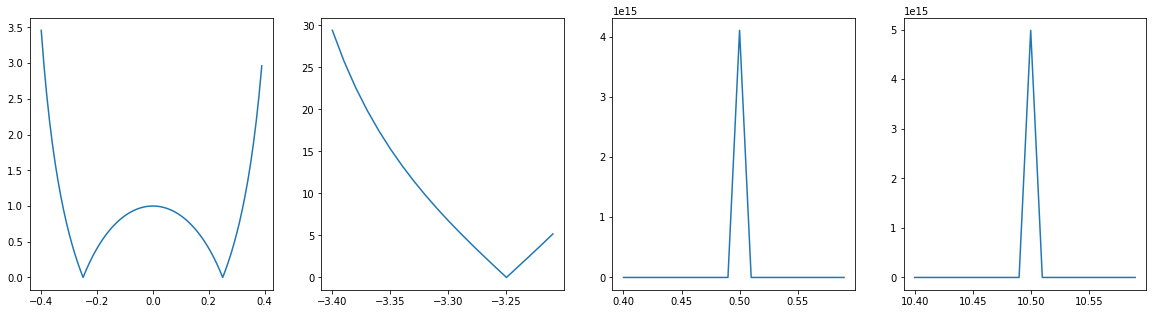

In [48]:
def condition_no_aprox(term_range):
    return [abs(x*2*pi*cos(2*pi*x)/f(x)) for x in term_range]

figure_2, axis_2 = plt.subplots(1, 4)

figure_2.set_figheight(5)
figure_2.set_figwidth(20)

x_range_2 = np.arange(-0.4,0.4,0.01)
x_range_3 = np.arange(-3.4,-3.2,0.01)
x_range_4 = np.arange(0.4, 0.6,0.01)
x_range_5 = np.arange(10.4, 10.6,0.01)



axis_2[0].plot(x_range_2, condition_no_aprox(x_range_2))
axis_2[1].plot(x_range_3, condition_no_aprox(x_range_3))
axis_2[2].plot(x_range_4, condition_no_aprox(x_range_4))
axis_2[3].plot(x_range_5, condition_no_aprox(x_range_5))



figure.supxlabel("Number of decimals")
figure.supylabel("Relative error (%)")
figure.suptitle("Relative error over number of decimals")
plt.show()

Now when using the approximation formula we are no longer restricted by the domain or arcsin and are able to explore the contion_no for the rest of the sin(2*pi*x) function.

With these three graphs, I've managed to find a pattern where the function will be relatively well conditioned between x = -0.4 and x = 0.4 (as shown in the first graph) as well as in between intervals of 0.5 (especially when the number has the form n.25 where n is any integer, as shown in the second graph). Moreover every 0.5 (excluding x = 0) the function becomes extremely ill-conditioned meaning that any tiny change in x will result in a massive change in sin(2*pi*x). 

So in terms of viewing the condition number, in this case, the approximation is much more insightful due to the particular cause of having to use arcsin with its restricted domain. However, in between the domain [-.0125,0.125] both ways of calculating the condition number behaved pretty much identically.